This code will look at a n stage regenerator. Then we will explicity show where the heat and work are coming from so we can see where the difference comes from

Currently there are two problems
  1. Not sure how to check really what we are doing outside of what the paper says. Changing V_g affects the path between isotherms, so it's easy to heavily change the COPs we get out based on that, which I guess makes sense but not sure how to check if it changes it correctly
  2. The units of n_a, n_g, and n_t are complicated. If we use their equation 1, then the units work, but the numbers do not. You get that the activated carbon sorbs more gas than you added. Not sure how to fix that so instead just using a fraction of filling type of approach

Current steps
  1. Create the 3D plot of COP as a function of regenerator stages and pressure ratios

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
We are storing the data here
[[-0.         -0.          4.11089777  3.87305532  4.02231493  3.96834626
   3.95909853  3.94037642  3.93623561  3.95609361  3.94435367  3.95057788
   3.93481466  3.93315269  3.95024143  3.93987367  3.94617685  3.94419726
   3.94225633  3.93411964]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.     

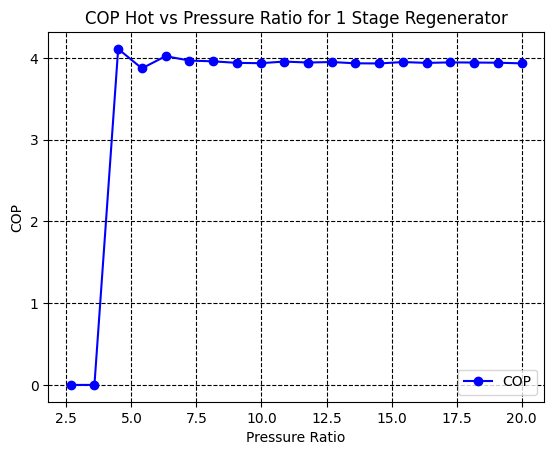

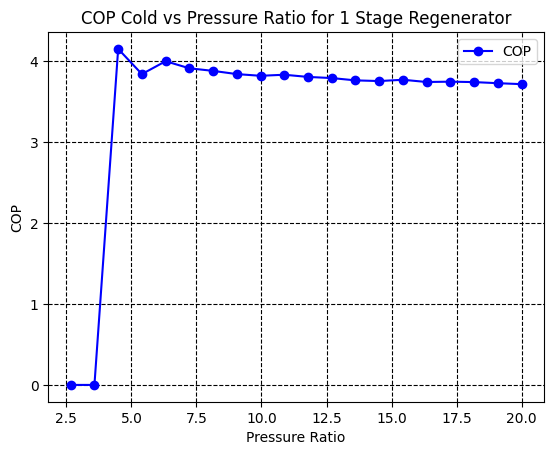

We are storing the data here
[[-0.         -0.          4.11089777  3.87305532  4.02231493  3.96834626
   3.95909853  3.94037642  3.93623561  3.95609361  3.94435367  3.95057788
   3.93481466  3.93315269  3.95024143  3.93987367  3.94617685  3.94419726
   3.94225633  3.93411964]
 [ 2.20476913  2.73137654  2.89213699  2.94273823  3.02569263  3.06118347
   3.09766254  3.13687576  3.16130662  3.18808102  3.20422561  3.22985972
   3.24598536  3.26291622  3.27873138  3.29413397  3.30829681  3.32239988
   3.33054707  3.34310854]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]


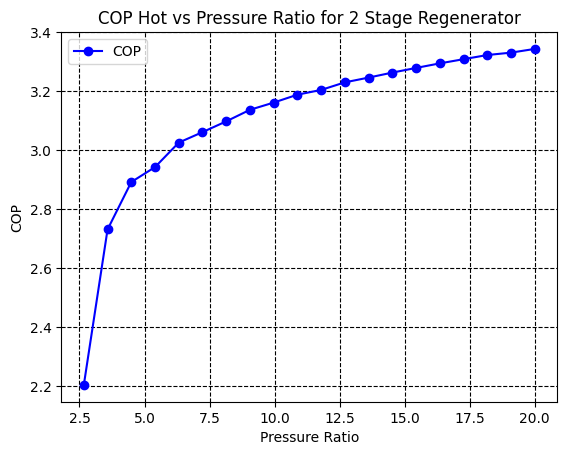

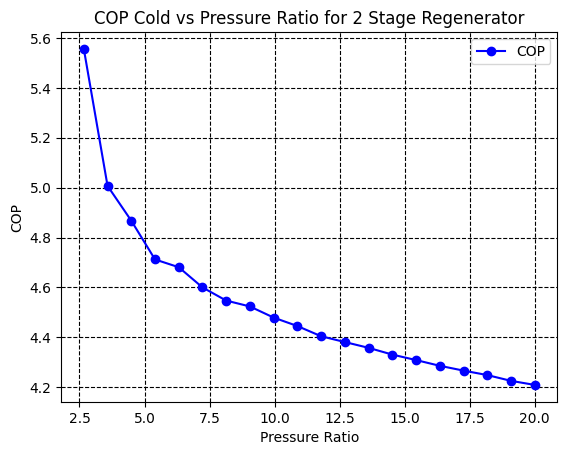

We are storing the data here
[[-0.         -0.          4.11089777  3.87305532  4.02231493  3.96834626
   3.95909853  3.94037642  3.93623561  3.95609361  3.94435367  3.95057788
   3.93481466  3.93315269  3.95024143  3.93987367  3.94617685  3.94419726
   3.94225633  3.93411964]
 [ 2.20476913  2.73137654  2.89213699  2.94273823  3.02569263  3.06118347
   3.09766254  3.13687576  3.16130662  3.18808102  3.20422561  3.22985972
   3.24598536  3.26291622  3.27873138  3.29413397  3.30829681  3.32239988
   3.33054707  3.34310854]
 [ 6.68022134  6.36361075  6.57198038  6.61719001  6.56241952  6.6821178
   6.61667444  6.68048725  6.70587156  6.72751691  6.7440214   6.75835417
   6.77707308  6.77093722  6.79951177  6.79420739  6.81672131  6.82254152
   6.83823675  6.83731175]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]

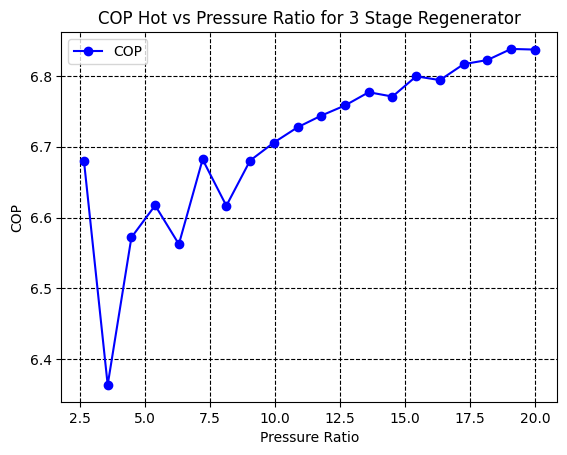

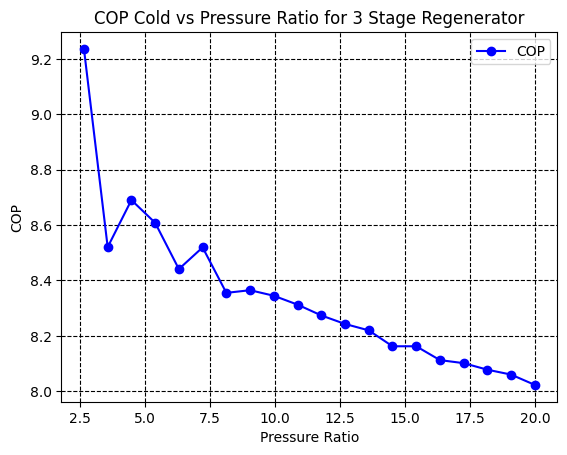

We are storing the data here
[[-0.         -0.          4.11089777  3.87305532  4.02231493  3.96834626
   3.95909853  3.94037642  3.93623561  3.95609361  3.94435367  3.95057788
   3.93481466  3.93315269  3.95024143  3.93987367  3.94617685  3.94419726
   3.94225633  3.93411964]
 [ 2.20476913  2.73137654  2.89213699  2.94273823  3.02569263  3.06118347
   3.09766254  3.13687576  3.16130662  3.18808102  3.20422561  3.22985972
   3.24598536  3.26291622  3.27873138  3.29413397  3.30829681  3.32239988
   3.33054707  3.34310854]
 [ 6.68022134  6.36361075  6.57198038  6.61719001  6.56241952  6.6821178
   6.61667444  6.68048725  6.70587156  6.72751691  6.7440214   6.75835417
   6.77707308  6.77093722  6.79951177  6.79420739  6.81672131  6.82254152
   6.83823675  6.83731175]
 [15.09849232 17.5353239  17.07810524 19.01937279 18.76267994 18.68466065
  19.29540911 19.55075774 19.59491852 19.66907171 19.76475778 19.85878073
  19.84218789 19.96432602 20.09345757 19.99728999 20.14374123 20.17227236
  2

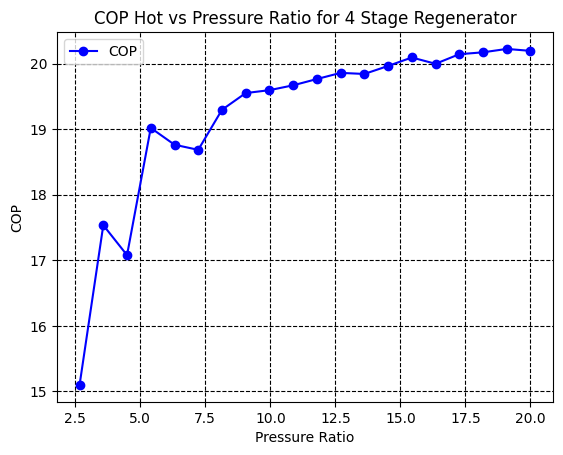

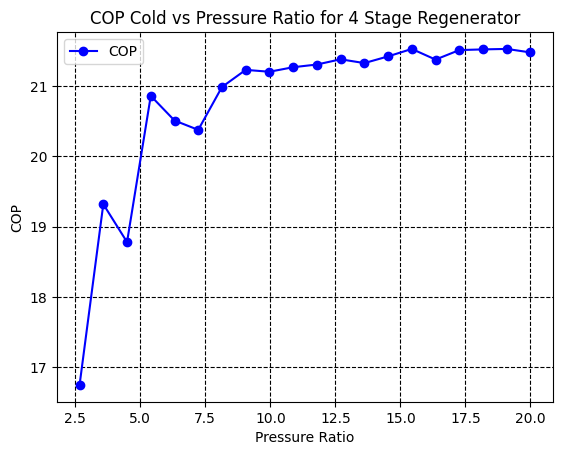

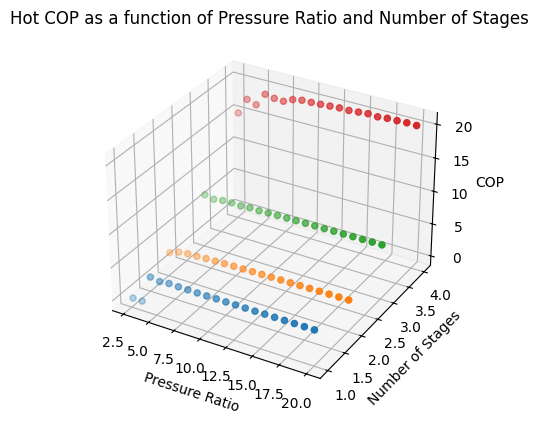

In [1]:
from mpl_toolkits import mplot3d
from re import M
%reset
import numpy as np
import matplotlib.pyplot as plt

# Now include all the functions

#Here is the isotherm function based on Petter's code and sorption data

def isotherm(P, T):
    """
    Langmuir-like isotherm equation.
    :param P: Pressure (Pa)
    :param T: Temperature (K)
    :return: Fraction of total loading
    """
    #n_a is moles adsorbed on activated carbon

    b = bo * np.exp(H_ads/(R*T))                            # This gives K equilibrium constant = bp/1+bp
    n_a = n_sat * (P*b / (1 + P*b))

    return n_a                                              # This is in mol/kg, positive                         #This is the filling based on isotherm


def changePressure_nt(P,T,dnt):
  # This is the function for finding dP/dn_t
  # This is a first order approximation of eq. 17. Here we say dP/dn_t = RT/V - dP/dn_a, so ideal gas law and then how much the pressure changes when sorbing, not sure if right
    dP_dnt = R * T / (V_g) #* abs(dnt)/dnt                                  #This is zeroth order approx where nothing is absorbed, works since dna << dnt based on sorption isotherms

    return dP_dnt                                                 #This is Pa*m^3/(mol) or J/mol, positive



#Finding all the differential terms

def find_na_nt(P,T,dnt):
  #This is the function to find n_a
  #This is hard because depending on the isotherm used, we could get unphysical answer, but as long as |dna| < |dnt|, we should be good enough
    dP = changePressure_nt(P,T,dnt) * dnt                             # This is a first order approximation of eq. 17. Here we say dP/dn_t = RT/V - dP/dn_a, so ideal gas law and then how much the pressure changes when sorbing, not sure if right                                                          #This has units J/mol * mol/m^3 = Pa
    dna = (isotherm(P+dP, T) - isotherm(P, T))                      #This is mol/kg            #Based on sorption data

    dna_dnt = dna / dnt                                               #This is mol/kg / mol/m^3 = m^3/kg


    return dna_dnt                                                    #This is m^3/kg, positive between 0 and 1

def find_ng_nt(P,T,dnt):
  #This is the function to find n_g
    dna_dnt = find_na_nt(P,T,dnt)                                        #This is m^3/kg
    dng_dnt = 1 - abs(dna_dnt)

    return dng_dnt                                                    #This is unitless, positive between 0 and 1



def changePressure_na(P,T,dnt):
  # This is the function for finding dP/dn_a

    dP_dnt = changePressure_nt(P,T,dnt)                               #This is J/mol
    dnt_dna = 1 / find_na_nt(P,T,dnt)                                  #This is kg/m^3
    dP_dna =  dP_dnt * dnt_dna                                         #This is Pa*m^3/mol * kg/m^3 = Pa*kg/mol

    return dP_dna                                                 #This is Pa*kg/mol, positive




def change_temperature_nt(P,T,dnt):
  #This is the function for finding dT/dnt, will be 0th order approximation where na<<nt, so all the dnt goes to temperature change
  #This function is very tricky, I think dT/dnt > 0 since if we add infinite particles adiabatically, then the particles will collide more which increases pressure, thus increasing temp nonlinearly
  #But if we use the ideal gas law, we get a negative number
  #So we need to be smart and figure out the right way to calculate this
  #Might not need the abs(dnt) part,

    dP = changePressure_nt(P,T,dnt) * dnt                             #This is Pa
    W = abs(dnt) * R * T * np.log((P + dP) / P)                       #This is Pa or J/m^3 because I am using abs(dnt) as a magnitude, not actually with units mol/m^3?
    #W = R * T * np.log((P + dP) / P)                                    #This is J/mol
    rho_g = P / (R * T)
    #W = (rho_g * V_g + dnt) * R * T * np.log(1 + dnt/(rho_g * V_g))
    #dT = W / (C_p * (rho_g * V_g + dnt))                                                       #This is K*mol/m^3
    dT = W / C_p
    dT_dnt = dT / dnt                                                 #This is K

    return dT_dnt                                                 #This is K*m^3/mol, positive



def change_ng_temperature(P,T,dnt):
  #This is the function for finding dn_g/dT

    dng_dnt = find_ng_nt(P,T,dnt)                                                 #This is unitless
    dT_dnt = change_temperature_nt(P,T,dnt)                                     #This is a first order approximation assuming the dna << dnt = dng for this calculation
                                                                                #This is K*m^3/mol
    dng_dT = dng_dnt / dT_dnt                                                   #This is mol/(K*m^3)

    return dng_dT                                                               #This is mol/(K*m^3), positive


def change_na_temperature(P,T,dnt):
  #This is the function for finding dn_a/dT, should be weird, maybe I should just do based on isotherm

    dT_dnt = change_temperature_nt(P,T,dnt)                               #This is K*m^3/mol, positive
    dT = dT_dnt * dnt                                                  #This is K
    dna = (isotherm(P, T + dT) - isotherm(P, T))                          #This is mol/kg
    dna_dT = dna / dT                                                   #This is mol/(kg*K)


    return dna_dT                                                 #This is mol/(kg*K), negative


#Adiabatic steps

# Differential equations for adiabatic operation (Eq. 20)
def adiabatic_step(T, P, dnt):

    dP_dnt = changePressure_nt(P,T,dnt)                                                       # This is a first order approximation of eq. 17. Here we say dP/dn_t = RT/V - dP/dn_a, so ideal gas law and then how much the pressure changes when sorbing, not sure if right
                                                                                                #This is J/mol
    dna_dT = change_na_temperature(P,T,dnt)                                                   #This is mol/(kg*K)
    dP_dna = changePressure_na(P,T,dnt)                                                       #This is Pa*kg/mol
    dng_dnt = find_ng_nt(P,T,dnt)                                                             #This is unitless
    dng_dT = change_ng_temperature(P,T,dnt)                                                   #This is mol/(K*m^3)
    dna_dnt = find_na_nt(P,T,dnt)                                                           #This is m^3/kg


    term1 = rho_b * (C_s + isotherm(P,T) * C_p)                                                     #Heat capacity of the system per unit volume, J/(m^3*K) or Pa/K
    term2 = V_g * P / (R * T) * C_p                                                              #This is Pa/K
    term3 = rho_b * lambda_st * dna_dT                                                            #This is Pa/K
    term4 = (V_g - (rho_b * lambda_st * 1 / dP_dna)) * R / V_g                                                #This is unitless
    term5 = (dng_dnt * dnt + T * dng_dT)                                                        #This is J/(K*m^3) or Pa/K               #This is saying that n_g is from P V_g = n_g RT and solving for n_g and derivatives
    #term6 = (C_p * (T_flow - T) + (V_g - (rho_b * lambda_st * 1 / dP_dna)) * dP_dnt)                    #This is what is in eq. 20
    term6 = -(V_g - (rho_b * lambda_st * 1 / dP_dna)) * dP_dnt                                     #This is J/mol                         #This is ignoring the heat capacity of the gas term since 8%, Pa*kg/mol or J*kg/(mol*m^3)

    dT_dnt = term6/(term1 + term2 + term3 - term4 * term5)                                      #This is J/mol / J/m^3K = K*m^3/mol

    dW_dnt_PV = V_g * dP_dnt / (gamma - 1)                                                   #This is J/mol                               #This is a PdV calculation for work
    dW_dnt_TV = term1 * dT_dnt / (gamma - 1)                                                  #This is J/mol                                 #This should be an equivalent version of work done during adaibatic process

    return dT_dnt, dP_dnt, dW_dnt_PV, dW_dnt_TV


# Differential equations for isothermal operation (Eq. 17)
def isothermal_step(P, T, dnt): # This is finding how much heat is transfered and pressure increased per unit of mole of gas,


    dna_dP = 1 / (changePressure_na(P,T,dnt))                                                  #This is mol/(Pa*kg)
    dP_dnt = changePressure_nt(P,T,dnt)                                                         #This is Pa*m^3/mol

    #dQ_dnt = -((V_g - rho_b * lambda_st * changePressure_na(P,T,dnt)) * dP_dnt + C_p * (T_flow - T))                     #Paper term but not what we are doing
    dQ_dnt = -(V_g - rho_b * lambda_st * dna_dP) * dP_dnt                                         #This is J/mol                              #We ignore the last term since heat capacity of CO2 and the temp swing we do ends up being 8% total energy

    dP = changePressure_nt(P,T,dnt) * dnt                             #This is Pa
    rho_g = P / (R * T)
    dW_dnt = (rho_g * V_g + dnt) * R * T * np.log(1 + dnt/(rho_g * V_g)) / dnt    #This is J/m^3 / mol/m^3 = J/mol

    dH_dnt = - lambda_st * dna_dP * dP_dnt                                                  #This is the heat of sorption for activated carbon, not used

    return dQ_dnt, dP_dnt, dW_dnt, dH_dnt






################################################################################


# Integrating the adiabatic steps

def runge_kutta_4_adiabatic_increase(T0, P0, h, steps, n_start):

    T = T0
    P = P0
    temperatures = [T]
    pressures = [P]
    na_ad = [0]
    W_PV = 0
    work_ad_PV = [W_PV]
    W_TV = 0
    work_ad_TV = [W_TV]

    count = 0

    #for _ in range(steps):                                                #Once the code works, change this to a while loop so that it only stops when the T crosses the high temp isotherm
    while True:
        dT, dP, dW_PV, dW_TV = adiabatic_step(T, P, h)                                  # Get dT and dP from adiabatic_step
        k1 = h * dT                                                       #This is mol/m^3 * K*m^3/mol = K                       # Multiply dT by h
        p1 = h * dP                                                       #This is mol/m^3 * J/mol = Pa                  # Multiply dP by h
        w1 = h * dW_PV                                                    #This is mol/m^3 * J/mol = J/m^3
        m1 = h * dW_TV                                                    #This is mol/m^3 * J/mol = J/m^3

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k1 / 2, P + p1 / 2, h)                         # Get dT and dP
        k2 = h * dT
        p2 = h * dP
        w2 = h * dW_PV
        m2 = h * dW_TV

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k2 / 2, P + p2 / 2, h)                         # Get dT and dP
        k3 = h * dT
        p3 = h * dP
        w3 = h * dW_PV
        m3 = h * dW_TV

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k3, P + p3, h)                             # Get dT and dP
        k4 = h * dT
        p4 = h * dP
        w4 = h * dW_PV
        m4 = h * dW_TV

        T = T + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        P = P + (p1 + 2 * p2 + 2 * p3 + p4) / 6


        W_PV = W_PV + (w1 + 2 * w2 + 2 * w3 + w4) / 6
        W_TV = W_TV + (m1 + 2 * m2 + 2 * m3 + m4) / 6
        # Append the new value to the na_iso list
        na_ad.append(isotherm(P,T))                                    #This is tracking how much CO2 is sorbed as P and T change, following the new isotherms

        count = count + 1

        if T >= T_hot:
          #This is telling the system to stop when T crosses the high temp isotherm
            #print("We stopped at count = " + str(count) +" and at temperature " + str(T) + " K and pressure " + str(P/1e5) + " bar")
            break


        temperatures.append(T)
        pressures.append(P)
        work_ad_PV.append(W_PV)
        work_ad_TV.append(W_TV)

    return np.array(temperatures), np.array(pressures), np.array(na_ad), np.array(work_ad_PV), np.array(work_ad_TV)


# Runge-Kutta 4th-order implementation for isothermal steps
def runge_kutta_4_isothermal_increase(P0, T, h, steps, P_start):

    P = P_start
    Q = 0.0
    W = 0
    H = 0
    pressures = [P]
    heat_transfers = [Q]
    gas_heat = [W]
    adsorb_heat = [H]
    na_iso = [0]
    count = 0

    while True:
        # Change here: unpack the result of isothermal_step into two variables
        dQ, dP, dW, dH = isothermal_step(P, T, h)
        k1 = h * dQ                                                             #This is mol/m^3 * J/mol = J/m^3                                 # Multiply dQ_dnt by h
        p1 = h * dP                                                             #This is mol/m^3 * J/mol = Pa
        w1 = h * dW                                                              #This is mol/m^3 * J/mol = J/m^3                              # Multiply dP_dnt by h
        h1 = h * dH

        dQ, dP, dW, dH = isothermal_step(P + p1 / 2, T, h)
        k2 = h * dQ
        p2 = h * dP
        w2 = h * dW
        h2 = h * dH

        dQ, dP, dW, dH = isothermal_step(P + p2 / 2, T, h)
        k3 = h * dQ
        p3 = h * dP
        w3 = h * dW
        h3 = h * dH

        dQ, dP, dW, dH = isothermal_step(P + p3, T, h)
        k4 = h * dQ
        p4 = h * dP
        w4 = h * dW
        h4 = h * dH

        P = P + (p1 + 2 * p2 + 2 * p3 + p4) / 6
        test = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        Q = Q + test
        W = W + (w1 + 2 * w2 + 2 * w3 + w4) / 6
        H = H + (h1 + 2 * h2 + 2 * h3 + h4) / 6

        na_iso.append(isotherm(P,T_hot))

        count = count + 1

        if P >= P_high:
          #This is telling the system to stop when P reaches the max allowable pressure
            #print("We stopped at count = " + str(count) + " and pressure " + str(P/1e5) + " bar")
            break

        pressures.append(P)
        heat_transfers.append(Q)
        gas_heat.append(W)
        adsorb_heat.append(H)

    return np.array(pressures), np.array(heat_transfers), np.array(na_iso), np.array(gas_heat), np.array(adsorb_heat)



#Reverse functions

# Integrating the adiabatic steps

def runge_kutta_4_adiabatic_decrease(T1, P1, h, steps, n_start):

    T = T1
    P = P1
    temperatures = [T]
    pressures = [P]
    na_ad = [0]
    W_PV = 0
    work_ad_PV = [W_PV]
    W_TV = 0
    work_ad_TV = [W_TV]

    count = 0

    #for _ in range(steps):                                                #Once the code works, change this to a while loop so that it only stops when the T crosses the high temp isotherm
    while True:
        dT, dP, dW_PV, dW_TV = adiabatic_step(T, P, h)                                  # Get dT and dP from adiabatic_step
        k1 = -h * dT                                                       # Multiply dT by h
        p1 = -h * dP                                                       # Multiply dP by h
        w1 = -h * dW_PV
        m1 = -h * dW_TV

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k1 / 2, P + p1 / 2, h)                         # Get dT and dP
        k2 = -h * dT
        p2 = -h * dP
        w2 = -h * dW_PV
        m2 = -h * dW_TV

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k2 / 2, P + p2 / 2, h)                         # Get dT and dP
        k3 = -h * dT
        p3 = -h * dP
        w3 = -h * dW_PV
        m3 = -h * dW_TV

        dT, dP, dW_PV, dW_TV = adiabatic_step(T + k3, P + p3, h)                             # Get dT and dP
        k4 = -h * dT
        p4 = -h * dP
        w4 = -h * dW_PV
        m4 = -h * dW_TV

        T = T + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        P = P + (p1 + 2 * p2 + 2 * p3 + p4) / 6
        W_PV = W_PV + (w1 + 2 * w2 + 2 * w3 + w4) / 6
        W_TV = W_TV + (m1 + 2 * m2 + 2 * m3 + m4) / 6
        # Append the new value to the na_iso list
        na_ad.append(isotherm(P,T))                                    #This is tracking how much CO2 is sorbed as P and T change, following the new isotherms

        count = count + 1

        if T <= T_cold:
          #This is telling the system to stop when T crosses the high temp isotherm
            #print("We stopped at count = " + str(count) +" and at temperature " + str(T) + " K and pressure " + str(P/1e5) + " bar")
            break

        temperatures.append(T)
        pressures.append(P)
        work_ad_PV.append(W_PV)
        work_ad_TV.append(W_TV)

    return np.array(temperatures), np.array(pressures), np.array(na_ad), np.array(work_ad_PV), np.array(work_ad_TV)



# Runge-Kutta 4th-order implementation for isothermal steps
def runge_kutta_4_isothermal_decrease(P0, T, h, steps, P_start):

    P = P_start
    pressures = [P]
    heat_transfers = [0]
    Q = 0
    W = 0
    H = 0
    gas_heat = [W]
    adsorb_heat = [H]
    na_iso = [0]

    count = 0

    while True:
        # Change here: unpack the result of isothermal_step into two variables
        dQ, dP, dW, dH = isothermal_step(P, T, h)
        k1 = -h * dQ                                                               # Multiply dQ_dnt by h
        p1 = -h * dP
        w1 = -h * dW
        h1 = -h * dH                                                              # Multiply dP_dnt by h

        dQ, dP, dW, dH = isothermal_step(P + p1 / 2, T, h)
        k2 = -h * dQ
        p2 = -h * dP
        w2 = -h * dW
        h2 = -h * dH

        dQ, dP, dW, dH = isothermal_step(P + p2 / 2, T, h)
        k3 = -h * dQ
        p3 = -h * dP
        w3 = -h * dW
        h3 = -h * dH

        dQ, dP, dW, dH = isothermal_step(P + p3, T, h)
        k4 = -h * dQ
        p4 = -h * dP
        w4 = -h * dW
        h4 = -h * dH

        P = P + (p1 + 2 * p2 + 2 * p3 + p4) / 6
        Q = Q + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        W = W + (w1 + 2 * w2 + 2 * w3 + w4) / 6
        #W = W + (w1 + 2 * w2 + 2 * w3) / 6
        H = H + (h1 + 2 * h2 + 2 * h3 + h4) / 6

        '''
        print("We have a work of W " + str(W))
        print("Each step in work is " + str((w1 + 2 * w2 + 2 * w3 + w4) / 6))
        '''

        if np.isnan(W):
          print("We have an error at pressure " + str(P/1e5) + " bar")
          print("We check the w1 = " + str(w1) + " w2 = " + str(w2) + " w3 = " + str(w3) + " w4 = " + str(w4))
          print("Since w4 is nan, we check k3 = " + str(k3))
          break



        count = count + 1

        if P <= P_low:
          #This is telling the system to stop when P reaches the max allowable pressure
            #print("We stopped at count = " + str(count) + " and pressure " + str(P/1e5) + " bar")
            break

        na_iso.append(isotherm(P,T_cold))
        pressures.append(P)
        heat_transfers.append(Q)
        gas_heat.append(W)
        adsorb_heat.append(H)

    return np.array(pressures), np.array(heat_transfers), np.array(na_iso), np.array(gas_heat), np.array(adsorb_heat)


############################################################################################################################################
############################################################################################################################################


#Now the actual code

# First is the isotherm derived from sorption system data, Peter's code

H_ads = 20.56*1000                                             #Enthalpy of adsorption, J/mol Source: https://sci-hub.se/10.1021/je100973t

bo = 1.06E-10                                                #Units - Pa, source: https://sci-hub.se/10.1021/je100973t
n_sat = 2.21*1000/44                                       #Langmuir saturation, mmol/g material dependent (source: https://sci-hub.se/10.1021/je100973t, given in kg/kg)
R = 8.314                                                 #J/mol*K




#Pick the temperatures of the isotherms
T_cold = 283                                              #Cold temperature, K
T_hot = 323                                               #Hot temperature, K


#This is the array for number of stages we sweep over
number_stages = [1,2,3,4]

#Sorption isotherm pressure                     #This is the pressures we want the isotherms to graph at
P_sorption_max = 3.5e6
P_sorption_min = 0


#Parameters
rho_b = 480                                # This is the density of the adsorbant activated carbon, kg/m^3
V_g = 0.6                                   # This is fluid phase volume per volume of the bed, m^3/m^3
rho_g = 44.9                                # This is molar gas phase density of CO2, mol/m^3                           # This also is rho_g = n_g / V_g = P / (R * T)
n_g = rho_g * V_g                           # This is the total number of moles in gas phase per unit volume, mol/m^3
                                                #This satisfies the equation rho_b * dn_a + d(V_g * rho_g) = dn_t since it is total number of moles divided by per unit volume
lambda_st = H_ads                           # J/mol
T0 = T_cold
T1 = T_hot
C_p = 37                                   # This is heat capacity of CO2? kJ/kmol K or J/mol K
C_s = 800                                    # This is heat capacity of activated carbon, J/kg K
gamma = 37.1 / 28.95                        #Adaiabatic Index for CO2


#This is a for loop to cycle over different pressure swings
#P_array_low = [1,1,1,1,1,1,1,1]                                             #These are in bar
#P_array_high = [2,4,6,8,10,12,14,16]                               #Need to be the same length as P_array_low
#P_array_low = [1]
#P_array_high = [16]
P_array_low = np.zeros(20) + 1.5
P_array_high = np.linspace(4,30,20)
COP_array = np.zeros(len(P_array_high))                           #This is the COP given a run
P_diff = np.zeros(len(P_array_high))                              #This is the pressure swing for each run

#This is step size basically, how much we are putting into the chamber
N_tot = rho_g * V_g                                               #This is total number of gas mol/m^3 we have in system initially
h = 0.01 * N_tot

# Initialize new_COP_hot and new_COP_cold before the loop
new_COP_hot = np.zeros((len(number_stages),len(P_array_low)))
new_COP_cold = np.zeros((len(number_stages),len(P_array_low)))

count = 0

# Initialize Z as a NumPy array with the correct dimensions
Z = np.zeros((len(number_stages), len(P_diff)))

#num_stages = 2                                           #This is how many stages in this regenerator
for i in range(len(number_stages)):
    num_stages = number_stages[i]

    T_middle = np.zeros(num_stages-1)                         #This is how many intermediate isotherms we need to run the stages
    for i in range(len(T_middle)):
        T_middle[i] = T_cold + (T_hot - T_cold) / (num_stages) * (i+1)
    T_array = np.concatenate((np.array([T_cold]), T_middle, np.array([T_hot])))                             #This is all the temperature data


                                               #This is how much mol/m^3 we are adding in each step

    COP_data = np.zeros((num_stages,len(P_array_low)))                #This holds the COP data, rows are at a given stage, columns are the different pressure ratios in that stage
    heat_data_hot = np.zeros((num_stages,len(P_array_low)))               #This is the heat data hot side
    heat_data_cold = np.zeros((num_stages,len(P_array_low)))               #This is the heat data cold side
    work_data = np.zeros((num_stages,len(P_array_low)))               #This is the work data







    for k in range(len(P_array_low)):
      #This runs over the different temperatures
        #Now do the standard analysis for one stage and store the data


        total_iso_work = 0
        total_ad_work_PV = 0
        total_ad_work_TV = 0
        total_work = 0
        total_heat = 0


        for j in range(num_stages):
            T_cold = T_array[j]
            T_hot = T_array[j+1]

            P_low = P_array_low[k] * 1e5
            P_high = P_array_high[k] * 1e5
            P0 = P_low
            P1 = P_high
            P_diff[k] = P_high / P_low                              #This is keeping track of the pressure swing
            COP = 0

            #print("The pressure swing is from " + str(P_low/1e5) + " bar to " + str(P_high/1e5) + " bar")



            P_test = np.linspace(P_sorption_min, P_sorption_max, 50)                         #This is the code for Peter's isotherms
            n_cold = isotherm(P_test, T_cold)
            n_hot = isotherm(P_test, T_hot)

            #Plot the isotherms
            '''
            plt.plot(P_test/1e5, n_cold, 'b-', label = "Cold T=283K")
            plt.plot(P_test/1e5, n_hot, 'r-', label = "Hot T=323K")
            plt.grid(visible=True, which='major', color='k', linestyle='--')
            plt.grid(visible=True, which='minor', color='k', linestyle='--')
            plt.xlabel('Pressure bar')
            plt.ylabel('Loading mol/kg')
            plt.title('Isotherms at low and high temperatures')
            plt.legend()
            plt.show()
            '''



            start_pressure = 0;
            end_pressure = 0;
            start_loading = 0;
            end_loading = 0;

            #This finds the bounds on loading based on the input pressure range
            for i in range(len(P_test)):

                if P_low >= min(P_test):
                    start_pressure = min(P_test, key = lambda x:abs(x-P_low))
                    start_loading = n_cold[np.where(P_test == start_pressure)[0][0]]
                    break
                else:
                    print("Input low pressure is out of range")
                    break

            for i in range(len(P_test)):

                if P_high <= max(P_test):
                    end_pressure = min(P_test, key = lambda x:abs(x-P_high))
                    end_loading = n_hot[np.where(P_test == end_pressure)[0][0]]
                    break
                else:
                    print("Input high pressure is out of range")
                    break


            #Now find how many mol/kg the system will used based on the selected pressures
            n_t_low = start_loading
            n_t_high = end_loading

            total_n_t = n_t_high - n_t_low
            steps = int(total_n_t / h)


            #This is the curve starting from the low pressure, low temp isotherm

            #First do adiabatic operation until T crosses the high temp isotherm

            # Adiabatic step simulation
            temperatures_ad, pressures_ad, na_ad, work_ad_PV, work_ad_TV = runge_kutta_4_adiabatic_increase(T_cold, P0, h, steps, n_t_low)
            P_end_ad = pressures_ad[-1]

            #Now do isothermal operation on the high temp isotherm

            # Isothermal step simulation
            pressures_iso, heat_transfers, na_iso, gas_heat, adsorb_heat = runge_kutta_4_isothermal_increase(P0, T_hot, h, steps, P_end_ad)
            P1 = pressures_iso[-1]


            #This is the curve starting at high pressure, high temperature isotherm

            #First do adiabatic operation until T crosses the low temp isotherm

            # Adiabatic step simulation
            temperatures_ad2, pressures_ad2, na_ad2, work_ad_PV2, work_ad_TV2 = runge_kutta_4_adiabatic_decrease(T_hot, P1, h, steps, n_t_high)
            P_end_ad2 = pressures_ad2[-1]


            #Now do isothermal operation on the low temp isotherm

            # Isothermal step simulation
            pressures_iso2, heat_transfers2, na_iso2, gas_heat2, adsorb_heat2 = runge_kutta_4_isothermal_decrease(P0, T_cold, h, steps, P_end_ad2)

            '''
            #Now plot the adiabatic steps on the graph

            plt.plot(P_test/1e5, n_cold, 'b--', label = "Cold T = " + str(T_cold) + " K for stage " + str(j+1), linewidth = 1)
            plt.plot(P_test/1e5, n_hot, 'r--', label = "Hot T = "  +str(T_hot) + " K for stage " + str(j+1), linewidth = 1)
            plt.plot(pressures_ad/1e5, na_ad[1:], 'm--', label = "Adiabatic operation curve", linewidth = 2)
            plt.plot(pressures_iso/1e5, na_iso[1:], 'g--', label = "Isothermal curve", linewidth = 2)
            plt.plot(pressures_ad2/1e5, na_ad2[1:], 'c--', label = "Adiabatic operation curve", linewidth = 2)
            plt.plot(pressures_iso2[:-1]/1e5, na_iso2[1:], 'y--', label = "Isothermal curve", linewidth = 2)
            plt.grid(visible=True, which='major', color='k', linestyle='--')
            plt.grid(visible=True, which='minor', color='k', linestyle='--')


            #This plots the regenerator steps on the same graph
            plt.xlabel('Pressure bar')
            plt.ylabel('Loading mol/kg')
            plt.title(str(num_stages) + ' Stage Regenerator at pressure ratio ' + str(P_diff[k]))
            plt.legend(prop = {'size':6})
            plt.show()
            '''


            #This is showing sign convention works
            total_iso_work = -(gas_heat[-1] + gas_heat2[-1])                                  #This is isothermal work
            total_ad_work_PV = work_ad_PV[-1] + work_ad_PV2[-1]                                       #This is adiabatic work
            total_ad_work_TV = work_ad_TV[-1] + work_ad_TV2[-1]                                      #This is adiabatic work, should be the same as above variable
            total_work = total_ad_work_TV + total_iso_work                                         #THis is total work
            total_heat_hot = -heat_transfers[-1]
            total_heat_cold = heat_transfers2[-1]

            '''
            print("The adiabatic compression work is " + str(work_ad_TV[-1]))
            print("The adiabatic expansion work is " + str(work_ad_TV2[-1]))
            print("The isothermal compression work is " + str(gas_heat[-1]))
            print("The isothermal expansion work is " + str(gas_heat2[-1]))
            print("Checking the 1st law of thermo: total energy is " + str(total_work - total_heat_hot + total_heat_cold))
            '''


            heat_data_hot[j, k] = total_heat_hot
            heat_data_cold[j, k] = total_heat_cold
            work_data[j, k] = total_work


    ################################################################################

    #heat_hot = np.sum(heat_data_hot, axis=0)                              #Need to sum because now this array stores only hot data, and need to sum over different stages?
    #heat_cold = np.sum(heat_data_cold, axis=0)
    heat_hot = heat_data_hot[-1]
    heat_cold = heat_data_cold[0]

    work = np.sum(work_data, axis=0)

    print("We are storing the data here")
    new_COP_hot[count] = heat_hot / work #/ num_stages
    new_COP_cold[count] = heat_cold / work #/ num_stages
    print(new_COP_hot)


    #Now plot Pressure swing vs COP
    plt.plot(P_diff,new_COP_hot[count], 'bo-', label = "COP")
    plt.grid(visible=True, which='major', color='k', linestyle='--')
    plt.grid(visible=True, which='minor', color='k', linestyle='--')
    plt.xlabel('Pressure Ratio')
    plt.ylabel('COP')
    plt.title('COP Hot vs Pressure Ratio for ' + str(num_stages) + ' Stage Regenerator')
    plt.legend()
    plt.show()

    #Now plot Pressure swing vs COP
    plt.plot(P_diff,new_COP_cold[count], 'bo-', label = "COP")
    plt.grid(visible=True, which='major', color='k', linestyle='--')
    plt.grid(visible=True, which='minor', color='k', linestyle='--')
    plt.xlabel('Pressure Ratio')
    plt.ylabel('COP')
    plt.title('COP Cold vs Pressure Ratio for ' + str(num_stages) + ' Stage Regenerator')
    plt.legend()
    plt.show()


    count = count + 1



#Plot the 3D graph of Pressure ratio vs Number of stages in regenerator vs COP
fig = plt.figure()
ax = plt.axes(projection ='3d')

for i in range(len(number_stages)):


    z = new_COP_hot[i]
    Z[i] = new_COP_hot[i]
    x = P_diff
    y = number_stages[i]
    ax.scatter(x, y, z)

# Create a meshgrid for x and y
#X, Y = np.meshgrid(x, number_stages)

# Plot the surface using the meshgrid and the 2D array Z
#ax.plot_surface(x, y, Z, cmap='viridis', edgecolor='green')

# syntax for plotting
ax.set_title('Hot COP as a function of Pressure Ratio and Number of Stages')
ax.set_xlabel('Pressure Ratio')
ax.set_ylabel('Number of Stages')
ax.set_zlabel('COP')
plt.show()

In [ ]:
print(Z)

[15.09849232 17.5353239  17.07810524 19.01937279 18.76267994 18.68466065
 19.29540911 19.55075774 19.59491852 19.66907171 19.76475778 19.85878073
 19.84218789 19.96432602 20.09345757 19.99728999 20.14374123 20.17227236
 20.22414976 20.19436947]
